### Import Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

## loading mnist datasets

In [5]:
mnist = tf.keras.datasets.mnist

## Data split

In [6]:
(X_train , Y_train),(X_test , Y_test) = mnist.load_data()

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

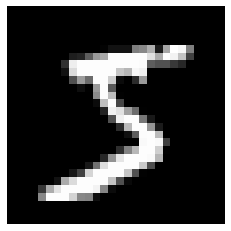

In [10]:
plt.imshow(X_train[0] , cmap='gray')
plt.axis("off")
plt.show()

## Image Normalization
- Normalization is an important step to make sure all features have the same importance

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

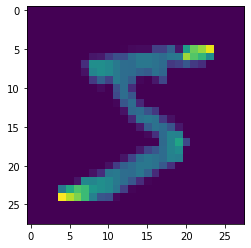

In [12]:
X_train = tf.keras.utils.normalize(X_train ,axis=1)
X_test = tf.keras.utils.normalize(X_test , axis=1)

print(X_train[0])


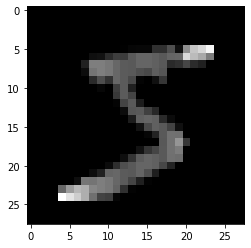

In [13]:
plt.imshow(X_train[0] ,cmap="gray")
plt.show()

## Building the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [16]:
model = Sequential()

In [17]:
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10 , activation="softmax"))

In [18]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

## Fit the model

In [19]:
model.fit(X_train,Y_train , epochs=5) # you can use more epochs if you want

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2644 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1092 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0539 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9863


## Evaluate the model

In [20]:
val_loss, val_acc = model.evaluate(X_test , Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9747


In [21]:
print(f"validation loss is: {val_loss}")
print("====================================")
print(f"validation accuracy is: {val_acc}")

validation loss is: 0.08508382737636566
validation accuracy is: 0.9746999740600586


### saving the model for future use

In [30]:
model.save('3.2_Keras_Examples\kerasNN.model')

INFO:tensorflow:Assets written to: 3.2_Keras_Examples\kerasNN.model\assets


INFO:tensorflow:Assets written to: 3.2_Keras_Examples\kerasNN.model\assets


### Predictions

In [31]:
new_model = tf.keras.models.load_model('3.2_Keras_Examples\kerasNN.model')

In [32]:
predictions = new_model.predict(X_test)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[3.95202981e-09 8.12476059e-11 3.27908992e-07 ... 9.99998808e-01
  2.71733960e-08 4.83101758e-07]
 [1.75002322e-11 1.25712324e-06 9.99997616e-01 ... 1.13630156e-11
  5.65116287e-10 9.89078520e-17]
 [1.11925873e-08 9.99862313e-01 4.07236848e-06 ... 2.15963719e-05
  1.01666687e-04 2.40134579e-08]
 ...
 [2.37185854e-10 3.70249360e-08 3.27310872e-08 ... 1.18807811e-05
  6.44866986e-07 4.36191913e-05]
 [4.15996612e-11 2.12034159e-08 2.35029024e-10 ... 5.30422428e-10
  2.44775347e-05 3.86356702e-12]
 [1.11026266e-09 8.47306136e-09 1.53591795e-09 ... 1.53836263e-10
  1.38134721e-08 1.12935647e-10]]


7


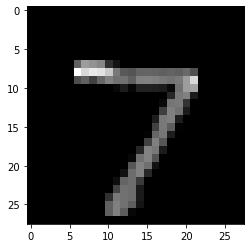

In [36]:
print(np.argmax(predictions[0]))
plt.imshow(X_test[0],cmap="gray")
plt.show()